In [77]:
import pandas as pd

# Read the CSV file

for i in range(50,100):
    
    try:
        df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{i}/metrics.csv')
        print(f"* {i} *"* 5)
        # Display the first few rows of the DataFrame to verify the data
        print(df.head(10))
    except:
        pass


* 50 ** 50 ** 50 ** 50 ** 50 *
   val_loss    val_cc  val_prec  val_f1  step  epoch    lr-SGD  val_acc  \
0       NaN       NaN       NaN     NaN     0    NaN  0.001000      NaN   
1  2.869466  0.105758  0.012245    0.12     3    0.0       NaN     0.12   
2       NaN       NaN       NaN     NaN     3    0.0       NaN      NaN   
3       NaN       NaN       NaN     NaN     4    NaN  0.001000      NaN   
4  2.774125  0.105758  0.012245    0.12     7    1.0       NaN     0.12   
5       NaN       NaN       NaN     NaN     7    1.0       NaN      NaN   
6       NaN       NaN       NaN     NaN     8    NaN  0.000999      NaN   
7  2.642856  0.105758  0.031111    0.12    11    2.0       NaN     0.12   
8       NaN       NaN       NaN     NaN    11    2.0       NaN      NaN   
9       NaN       NaN       NaN     NaN    12    NaN  0.000998      NaN   

   train_cc  train_f1  train_acc  train_loss  train_prec  
0       NaN       NaN        NaN         NaN         NaN  
1       NaN       NaN    

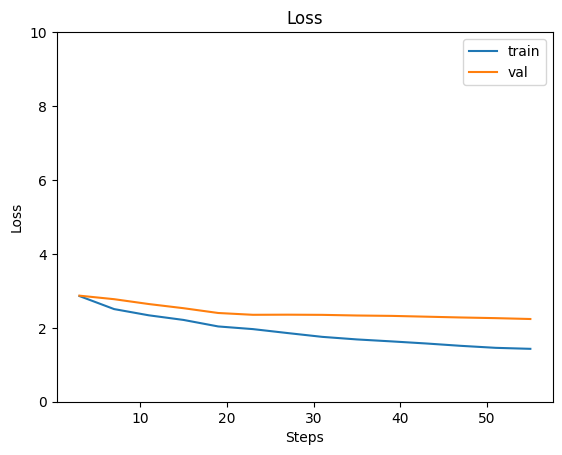

In [78]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_loss']].dropna()
x_val = val_df['step']
y_val = val_df['val_loss']

train_df = df[['step', 'train_loss']].dropna()
x_train = train_df['step']
y_train = train_df['train_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss')

ax = plt.gca()
ax.set_ylim([0,10])

plt.legend()

# Show the plot
plt.show()


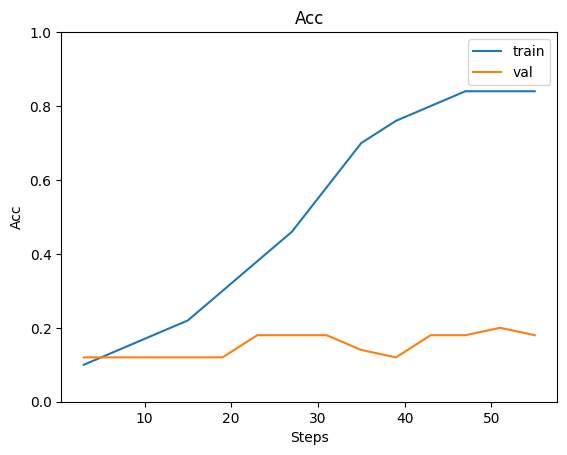

In [79]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_acc']].dropna()
x_val = val_df['step']
y_val = val_df['val_acc']

train_df = df[['step', 'train_acc']].dropna()
x_train = train_df['step']
y_train = train_df['train_acc']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Acc')
plt.title('Acc')

ax = plt.gca()
ax.set_ylim([0,1])


plt.legend()

# Show the plot
plt.show()


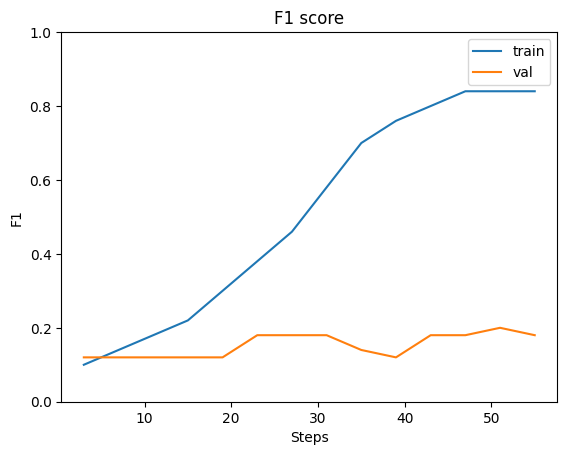

In [80]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_f1']].dropna()
x_val = val_df['step']
y_val = val_df['val_f1']

train_df = df[['step', 'train_f1']].dropna()
x_train = train_df['step']
y_train = train_df['train_f1']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('F1')
plt.title('F1 score')

ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

# Show the plot
plt.show()


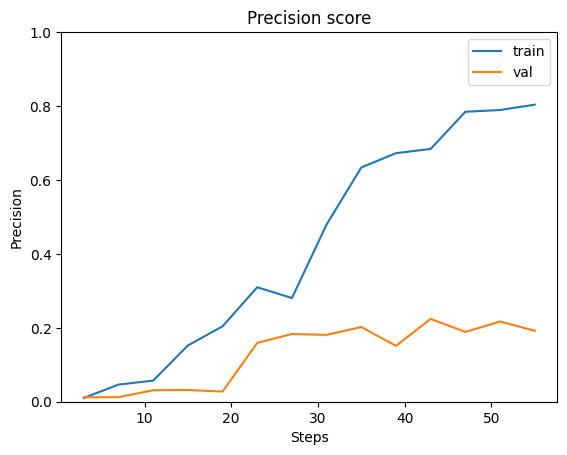

In [81]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_prec']].dropna()
x_val = val_df['step']
y_val = val_df['val_prec']

train_df = df[['step', 'train_prec']].dropna()
x_train = train_df['step']
y_train = train_df['train_prec']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Precision')
plt.title('Precision score')

ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

# Show the plot
plt.show()


In [74]:
val_df

,step,val_prec
1,3,0.012245


In [75]:
list(set(df['step']))

[0, 3]

In [76]:
df['val_loss'].dropna()

1    2.869466
Name: val_loss, dtype: float64